## Demo of data_processing package

In [1]:
from data_processing import *

In [2]:
# generate_economic_indicators()

In [3]:
# for i in ['original', 'energy', 'industry', 'consumer']:
#     generate_SP500_index(index = i)

In [4]:
SP500 = pd.read_csv('data/SP500_original.csv', parse_dates=['date'])
SP500.head()

,date,Close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000


In [5]:
SP500_industry = pd.read_csv('data/SP500_industry.csv', parse_dates=['date'])
SP500_industry.head()

,date,Close
0,1993-05-04,94.949997
1,1993-05-05,95.599998
2,1993-05-06,96.019997
3,1993-05-07,95.919998
4,1993-05-10,95.910004


In [6]:
cpi_month = pd.read_csv('data/cpi_month.csv', parse_dates=['date'])
cpi_month.head()

,date,cpi_month
0,2022-12-01,296.797
1,2022-11-01,297.711
2,2022-10-01,298.012
3,2022-09-01,296.808
4,2022-08-01,296.171


In [7]:
fundrate_week = pd.read_csv('data/fundrate_week.csv', parse_dates=['date'])
fundrate_week.head()

,date,fundrate_week
0,2023-02-01,4.33
1,2023-01-25,4.33
2,2023-01-18,4.33
3,2023-01-11,4.33
4,2023-01-04,4.33


In [8]:
# select the time range for SP500
select_sp500 = subset(SP500_industry, start_time = '2020-01-12', end_time = '2022-12-30')
select_sp500.head()

,date,Close
6719,2020-01-13,704.159973
6720,2020-01-14,704.150024
6721,2020-01-15,704.750000
6722,2020-01-16,711.840027
6723,2020-01-17,711.830017


In [9]:
select_sp500.tail()

,date,Close
7463,2022-12-23,832.859985
7464,2022-12-27,835.580017
7465,2022-12-28,824.599976
7466,2022-12-29,834.700012
7467,2022-12-30,831.400024


In [10]:
# modify the SP500 (sector) index with moving average
select_sp500 = moving_average(df = select_sp500, col = 'Close', MA = 7)
select_sp500.head(10)

/Users/gawain/Desktop/DATA534_Project-main/data_processing.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = MA_data


,date,Close,MA7_Close
6719,2020-01-13,704.159973,NaN
6720,2020-01-14,704.150024,NaN
6721,2020-01-15,704.750000,NaN
6722,2020-01-16,711.840027,NaN
6723,2020-01-17,711.830017,NaN
6724,2020-01-21,704.099976,NaN
6725,2020-01-22,700.020020,705.835720
6726,2020-01-23,707.900024,706.370013
6727,2020-01-24,704.530029,706.424299
6728,2020-01-27,691.380005,704.514300


## Demo of explore package

In [11]:
from explore import *

In [12]:
cpi_cols = get_numeric_cols(cpi_month)
cpi_cols

['cpi_month']

In [13]:
time_series_trend(cpi_month, cpi_cols, '2000-01-01','2022-01-01')

/Users/gawain/.pyenv/versions/3.9.1/lib/python3.9/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

In [14]:
boxplot_year(cpi_month, cpi_cols, [2008,2012])

alt.RepeatChart(...)

In [15]:
from functools import reduce
unemployment = pd.read_csv('data/unemployment.csv', parse_dates=['date'])
fundrate_month = pd.read_csv('data/fundrate_month.csv', parse_dates=['date'])
retail = pd.read_csv('data/retail.csv', parse_dates=['date'])
durables = pd.read_csv('data/durables.csv', parse_dates=['date'])
dfs = [cpi_month, unemployment, fundrate_month, retail, durables]
df_combined = reduce(lambda  left,right: pd.merge(left, right, on=['date'], how='outer'), dfs)
df_combined.dropna(inplace=True)
df_combined

,date,cpi_month,unemployment,fundrate_month,retail,durables
0,2022-12-01,296.797,3.5,4.10,660004.0,296824.0
1,2022-11-01,297.711,3.6,3.78,610784.0,259606.0
2,2022-10-01,298.012,3.7,3.08,597349.0,273120.0
3,2022-09-01,296.808,3.5,2.56,577370.0,289932.0
4,2022-08-01,296.171,3.7,2.33,613416.0,279323.0
...,...,...,...,...,...,...
366,1992-06-01,140.200,7.8,3.76,151849.0,131268.0
367,1992-05-01,139.700,7.6,3.82,152420.0,122274.0
368,1992-04-01,139.500,7.4,3.73,147175.0,123268.0
369,1992-03-01,139.300,7.4,3.98,142488.0,129309.0


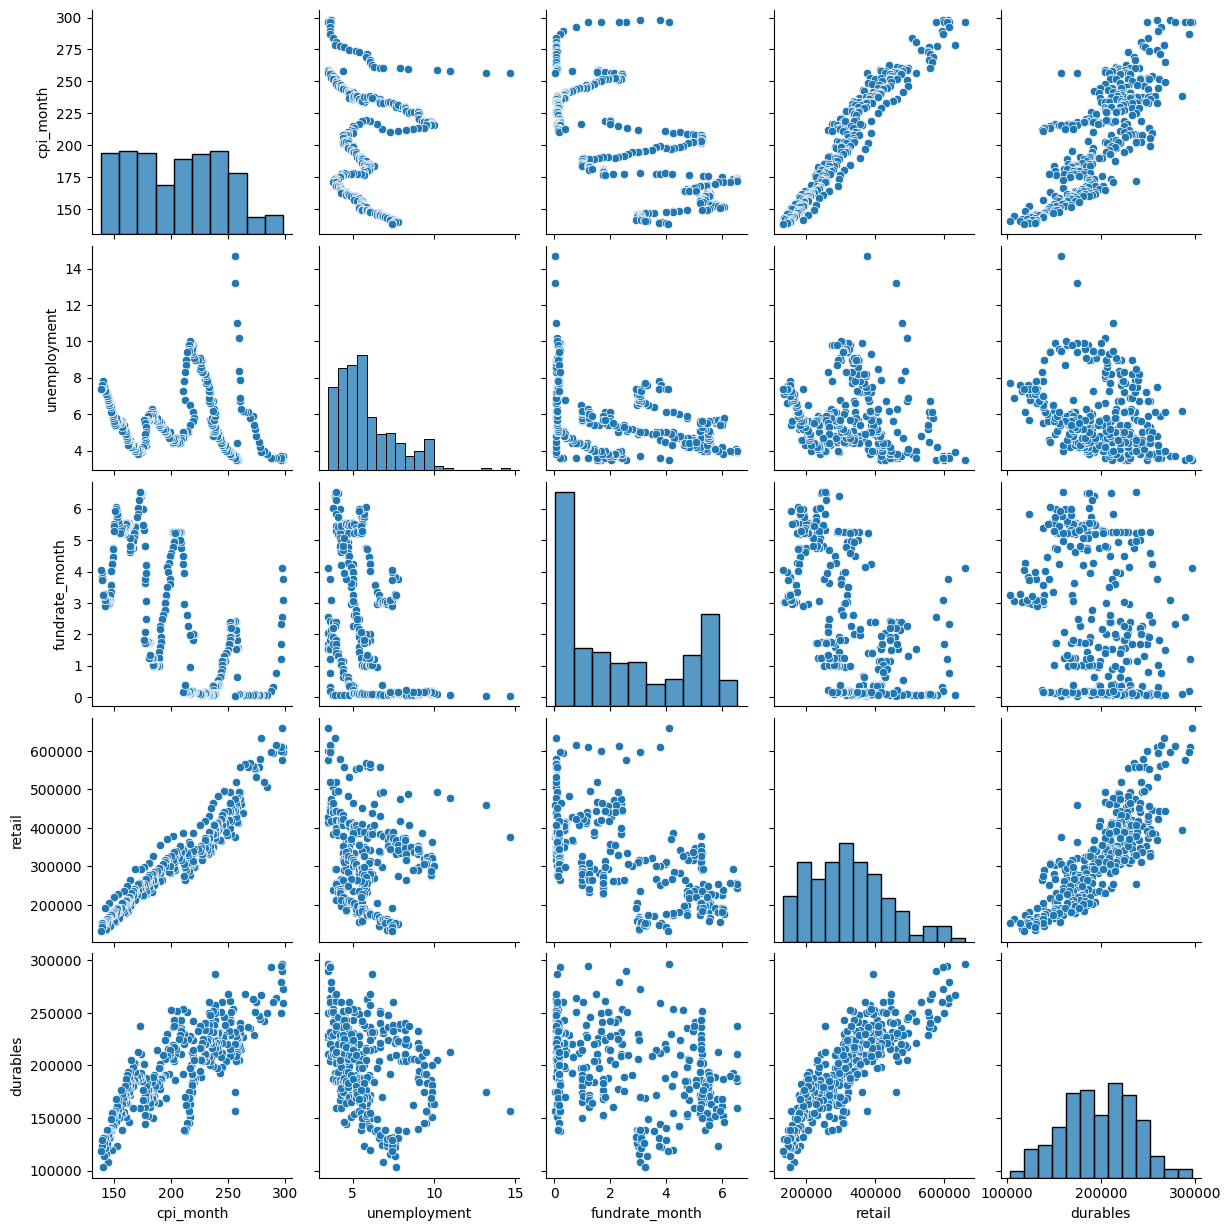

In [16]:
correlation_scatter(df_combined)

In [17]:
correlation_heatmap(df_combined)

/Users/gawain/Desktop/DATA534_Project-main/explore.py:72: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr("spearman").stack().reset_index(name='corr')
/Users/gawain/.pyenv/versions/3.9.1/lib/python3.9/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

## Demo of model package

In [18]:
from model import *

From above pairplot, we can see that there is a linear relationship between cpi_month and retail. Fit a linear model to check.

In [19]:
CPIRetail = pd.merge(cpi_month, retail, how = 'outer', on = 'date').dropna()
CPIRetail

,date,cpi_month,retail
0,2022-12-01,296.797,660004.0
1,2022-11-01,297.711,610784.0
2,2022-10-01,298.012,597349.0
3,2022-09-01,296.808,577370.0
4,2022-08-01,296.171,613416.0
...,...,...,...
367,1992-05-01,139.700,152420.0
368,1992-04-01,139.500,147175.0
369,1992-03-01,139.300,142488.0
370,1992-02-01,138.600,131244.0


In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(CPIRetail[['cpi_month']], CPIRetail['retail'], test_size=0.2, random_state=42)
lm = LmModel(X_train, X_test, y_train, y_test)
lm.get_summary()

{'MSE': 834663957.694357,
 'Coefficients': array([2615.19563358]),
 'Intercept': -216022.481559088,
 'Residuals': 327    -2104.489506
 33    -30713.739403
 15     31488.167311
 314     3964.012763
 57      8314.950416
            ...     
 94    -55965.467947
 195    -3825.712495
 311   -18982.143744
 292     5304.515032
 347   -21043.120071
 Name: retail, Length: 75, dtype: float64,
 'Equation': 'y = -216022.481559088 + 2615.195633583 * cpi_month',
 'Train score': 0.9178609825243534,
 'Test score': 0.9404558850730231}